In [247]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('VCG.csv')
df1=df.reset_index()['Price']

# Dự đoán theo tỉ lệ 9:1

In [248]:
# Chuẩn bị dữ liệu
data = np.array(df1)
scaler = MinMaxScaler()
data = scaler.fit_transform(data.reshape(-1, 1))

# Chia dữ liệu thành chuỗi con
window_size = 10
X = []
y = []
for i in range(window_size, len(data)):
    X.append(data[i-window_size:i, 0])
    y.append(data[i, 0])
X = np.array(X)
y = np.array(y)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_size = int(0.9 * len(df1))
test_size = int(0.1 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [249]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Xây dựng mô hình NNAR
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/100
23/23 [==============================] - 2s 22ms/step - loss: 0.1583 - val_loss: 0.0240
Epoch 2/100
23/23 [==============================] - 0s 12ms/step - loss: 0.0478 - val_loss: 0.0028
Epoch 3/100
23/23 [==============================] - 0s 11ms/step - loss: 0.0063 - val_loss: 9.7110e-04
Epoch 4/100
23/23 [==============================] - 0s 16ms/step - loss: 0.0023 - val_loss: 0.0013
Epoch 5/100
23/23 [==============================] - 0s 17ms/step - loss: 0.0015 - val_loss: 8.7071e-04
Epoch 6/100
23/23 [==============================] - 0s 16ms/step - loss: 0.0011 - val_loss: 7.1279e-04
Epoch 7/100
23/23 [==============================] - 0s 17ms/step - loss: 0.0010 - val_loss: 7.2458e-04
Epoch 8/100
23/23 [==============================] - 0s 17ms/step - loss: 9.6765e-04 - val_loss: 7.2692e-04
Epoch 9/100
23/23 [==============================] - 0s 17ms/step - loss: 9.4074e-04 - val_loss: 7.7254e-04
Epoch 10/100
23/23 [==============================] - 0s 16ms/step -

In [250]:
y_pred = model.predict(X_test)

5/5 [==============================] - 0s 4ms/step


In [251]:
# Tính toán sai số tuyệt đối và chuẩn hóa thành phần trăm
errors = np.abs((y_test- y_pred) / y_test) * 100

# Tính giá trị MAPE
mape = np.mean(errors)

print('Testing MAPE:', mape)

Testing MAPE: 30.738023410337096


In [252]:
y_pred=scaler.inverse_transform(y_pred)
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 19059.589200031292


Testing MAPE: 30.738023410337096
Testing RMSE: 19059.589200031292


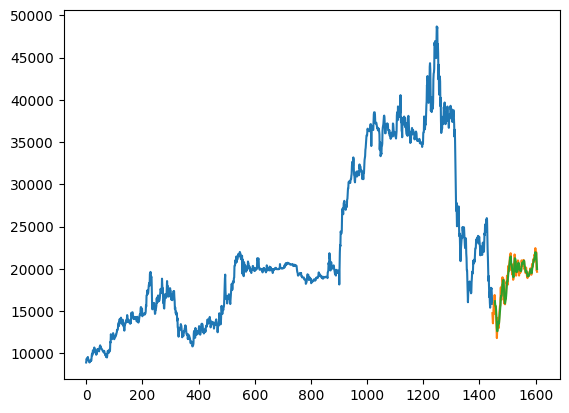

In [253]:
print('Testing MAPE:', mape)
print('Testing RMSE:', test_rmse)
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data)
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data)
pred_data_index = pd.RangeIndex(start=train_size+9, stop=train_size+test_size, step=1)
plt.plot(pred_data_index,(y_pred))

# Dự đoán theo tỉ kệ 8:2

In [254]:
# Chuẩn bị dữ liệu
data = np.array(df1)
scaler = MinMaxScaler()
data = scaler.fit_transform(data.reshape(-1, 1))

# Chia dữ liệu thành chuỗi con
window_size = 10
X = []
y = []
for i in range(window_size, len(data)):
    X.append(data[i-window_size:i, 0])
    y.append(data[i, 0])
X = np.array(X)
y = np.array(y)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_size = int(0.8 * len(df1))
test_size = int(0.2 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [255]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Xây dựng mô hình NNAR
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/100
21/21 [==============================] - 2s 23ms/step - loss: 0.1638 - val_loss: 0.0535
Epoch 2/100
21/21 [==============================] - 0s 11ms/step - loss: 0.0534 - val_loss: 0.0037
Epoch 3/100
21/21 [==============================] - 0s 11ms/step - loss: 0.0041 - val_loss: 0.0018
Epoch 4/100
21/21 [==============================] - 0s 11ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 5/100
21/21 [==============================] - 0s 11ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 6/100
21/21 [==============================] - 0s 13ms/step - loss: 9.4476e-04 - val_loss: 0.0017
Epoch 7/100
21/21 [==============================] - 0s 10ms/step - loss: 8.9277e-04 - val_loss: 0.0016
Epoch 8/100
21/21 [==============================] - 0s 12ms/step - loss: 7.7247e-04 - val_loss: 0.0016
Epoch 9/100
21/21 [==============================] - 0s 11ms/step - loss: 7.0825e-04 - val_loss: 0.0016
Epoch 10/100
21/21 [==============================] - 0s 11ms/step - loss: 6.1740e-0

In [256]:
y_pred = model.predict(X_test)

10/10 [==============================] - 0s 3ms/step


In [257]:
# Tính toán sai số tuyệt đối và chuẩn hóa thành phần trăm
errors = np.abs((y_test- y_pred) / y_test) * 100

# Tính giá trị MAPE
mape = np.mean(errors)

print('Testing MAPE:', mape)

Testing MAPE: 49.055643576917745


In [258]:
y_pred=scaler.inverse_transform(y_pred)
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 22320.624737686958


Testing MAPE: 49.055643576917745
Testing RMSE: 22320.624737686958


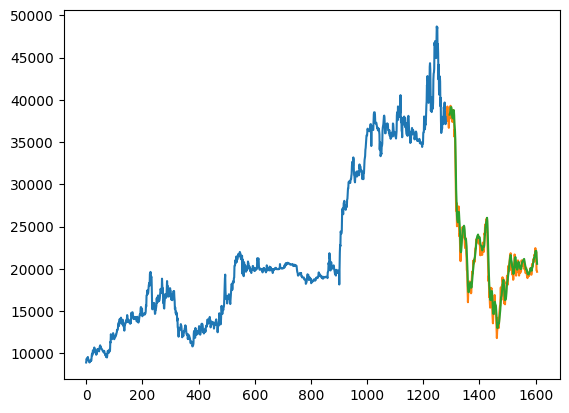

In [259]:
print('Testing MAPE:', mape)
print('Testing RMSE:', test_rmse)
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data)
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data)
pred_data_index = pd.RangeIndex(start=train_size+9, stop=train_size+test_size, step=1)
plt.plot(pred_data_index,(y_pred))

# Dự đoán theo tỉ kệ 7:3

In [260]:
# Chuẩn bị dữ liệu
data = np.array(df1)
scaler = MinMaxScaler()
data = scaler.fit_transform(data.reshape(-1, 1))

# Chia dữ liệu thành chuỗi con
window_size = 10
X = []
y = []
for i in range(window_size, len(data)):
    X.append(data[i-window_size:i, 0])
    y.append(data[i, 0])
X = np.array(X)
y = np.array(y)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_size = int(0.7 * len(df1))
test_size = int(0.3 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [261]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Xây dựng mô hình NNAR
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/100
18/18 [==============================] - 2s 27ms/step - loss: 0.1096 - val_loss: 0.1721
Epoch 2/100
18/18 [==============================] - 0s 15ms/step - loss: 0.0414 - val_loss: 0.0292
Epoch 3/100
18/18 [==============================] - 0s 11ms/step - loss: 0.0037 - val_loss: 0.0032
Epoch 4/100
18/18 [==============================] - 0s 13ms/step - loss: 8.8079e-04 - val_loss: 0.0041
Epoch 5/100
18/18 [==============================] - 0s 20ms/step - loss: 5.5690e-04 - val_loss: 0.0031
Epoch 6/100
18/18 [==============================] - 0s 18ms/step - loss: 4.2503e-04 - val_loss: 0.0024
Epoch 7/100
18/18 [==============================] - 0s 17ms/step - loss: 4.0988e-04 - val_loss: 0.0025
Epoch 8/100
18/18 [==============================] - 0s 18ms/step - loss: 4.0242e-04 - val_loss: 0.0021
Epoch 9/100
18/18 [==============================] - 0s 18ms/step - loss: 3.8414e-04 - val_loss: 0.0020
Epoch 10/100
18/18 [==============================] - 0s 18ms/step - loss: 3

In [262]:
y_pred = model.predict(X_test)

15/15 [==============================] - 0s 3ms/step


In [263]:
# Tính toán sai số tuyệt đối và chuẩn hóa thành phần trăm
errors = np.abs((y_test- y_pred) / y_test) * 100

# Tính giá trị MAPE
mape = np.mean(errors)

print('Testing MAPE:', mape)

Testing MAPE: 75.49746867017483


In [264]:
y_pred=scaler.inverse_transform(y_pred)
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 28735.847352055036


Testing MAPE: 75.49746867017483
Testing RMSE: 28735.847352055036


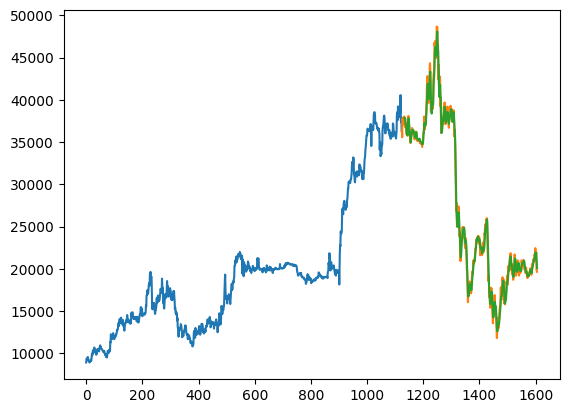

In [265]:
print('Testing MAPE:', mape)
print('Testing RMSE:', test_rmse)
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data)
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data)
pred_data_index = pd.RangeIndex(start=train_size+9, stop=train_size+test_size, step=1)
plt.plot(pred_data_index,(y_pred))